Importações das Bibliotecas

In [1]:
import numpy as np
import tensorflow as tf
!pip install transformers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.models import Model
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.9 MB/s eta 0:00:00


#*Processamento da Linguagem Natural através das Redes Neurais*

As redes neurais têm desempenhado um papel fundamental na ciência de dados, permitindo a análise e interpretação de dados complexos, bem como a construção de modelos de aprendizado de máquina para tarefas diversas. Dessa forma iremos
as redes neurais e o seu fundamental na ciência de dados, permitindo a análise e interpretação de dados complexos, bem como a construção de modelos de aprendizado de máquina para tarefas diversas.

Essas redes desempenham um papel fundamental na ciência de dados, especialmente na área de aprendizado de máquina e inteligência artificial. Elas são modelos computacionais inspirados no funcionamento do sistema nervoso humano, e têm a capacidade de aprender a partir de dados para realizar tarefas complexas de classificação, previsão, reconhecimento de padrões e muito mais.




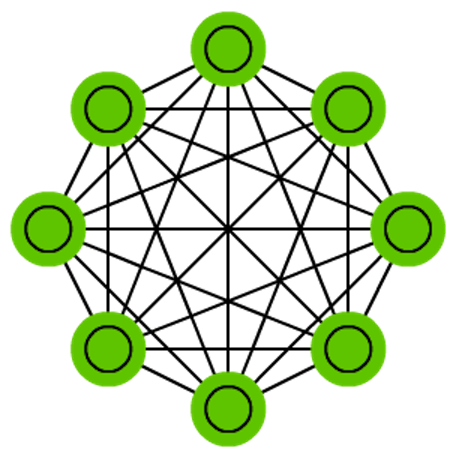

**Imagem 1: Ligação das Redes Neurais**

Dentre as principais interpretações para essas transformações, temos:

1. Análise de Sentimentos
2. Geração de Texto

Essas são apenas algumas das coisas que (RNNs) sofrem de transformações, graças as (NLP).





#**Análise de Sentimentos usando RNNs**

Imagine que você é parte de uma equipe de um serviço de streaming de filmes. O serviço permite que os usuários assistam a uma ampla variedade de filmes sob demanda. A equipe deseja entender como os usuários estão respondendo aos filmes oferecidos e identificar rapidamente os filmes populares e aqueles que talvez precisem de melhorias.

A equipe implementou um sistema que permite que os usuários classifiquem os filmes em "bom" ou "ruim", auxiliando a equipe em melhorias e auxiliando no desenvolvendo de conteúdos cada vez mais adequados para seus telespectadores.

In [8]:
# Dados de exemplo
reviews = ['Esse filme é ótimo!', 'Não gostei.', 'A atuação foi excelente.']
sentiments = np.array([1, 0, 1])  # 0 - negativo, 1 - positivo


In [9]:
# Tokenização e sequências
tokenizer = Tokenizer()
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
sequences = pad_sequences(sequences)

# Modelo RNN (LSTM) para análise de sentimentos
input_layer = Input(shape=(sequences.shape[1],))
embedding_layer = Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128)(input_layer)
lstm_layer = LSTM(128)(embedding_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model_sentimento = Model(inputs=input_layer, outputs=output_layer)
model_sentimento.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_sentimento.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 embedding_1 (Embedding)     (None, 4, 128)            1408      
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 133,121
Trainable params: 133,121
Non-trainable params: 0
_________________________________________________________________


In [10]:

# Treinamento do modelo
model_sentimento.fit(sequences, sentiments, epochs=10, batch_size=1)

# Avaliação do modelo
perda, acuracia = model_sentimento.evaluate(sequences, sentiments)
print("Perda:", perda)
print("Acurácia:", acuracia)


Epoch 1/10
3/3 [==============================] - 1s 6ms/step - loss: 0.6984 - accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 0s 5ms/step - loss: 0.6736 - accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 0s 4ms/step - loss: 0.6487 - accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 0s 5ms/step - loss: 0.5834 - accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 0s 6ms/step - loss: 0.5312 - accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 0s 6ms/step - loss: 0.4613 - accuracy: 1.0000
Epoch 8/10
3/3 [==============================] - 0s 5ms/step - loss: 0.3743 - accuracy: 1.0000
Epoch 9/10
3/3 [==============================] - 0s 5ms/step - loss: 0.2719 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 367ms/step - loss: 0.1100 - accuracy: 1.0000
Perda: 0.11000147461891174
Acurác

A análise de sentimentos é usada para determinar o sentimento expresso em um pedaço de texto (como positivo, negativo ou neutro). As RNNs podem analisar padrões de palavras e estruturas sintáticas para identificar os sentimentos. Isso é valioso para monitorar o feedback do cliente, opiniões sobre produtos ou serviços e avaliações em redes sociais.

#**Geração de Texto usando Transformadores (GPT-2)**

Suponha que você trabalhe para uma empresa de jogos que cria jogos de aventura interativos onde os jogadores podem influenciar a direção da história. A empresa está procurando uma maneira de gerar automaticamente continuções intrigantes para histórias baseadas nas escolhas dos jogadores.



In [11]:
from transformers import GPT2Tokenizer, TFGPT2LMHeadModel

# Carregar o modelo
tokenizer_gpt2 = GPT2Tokenizer.from_pretrained('gpt2')
model_gpt2 = TFGPT2LMHeadModel.from_pretrained('gpt2')

# Geração de texto
input_text = "Era uma vez"
input_ids = tokenizer_gpt2.encode(input_text, return_tensors='tf')




All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [12]:
# Gerar texto condicional
output = model_gpt2.generate(input_ids,
                             max_length=100,  # Comprimento máximo do texto gerado
                             num_return_sequences=1,
                             no_repeat_ngram_size=2,
                             pad_token_id=tokenizer_gpt2.eos_token_id)

# Decodificar o texto gerado
generated_text = tokenizer_gpt2.decode(output[0], skip_special_tokens=True)
print("Texto Gerado:", generated_text)

Texto Gerado: Era uma vez.

"I'm not going to be a part of this. I'm going out there and I want to help people. And I don't want anyone to think I am a racist. But I do want people to know that I have a lot of respect for people and that they can come to me and say, 'Hey, I love you, but I hate you.' "
.@Spencer_McKenzie: "I don'


Os transformadores, como o GPT-2, são modelos de linguagem que podem gerar texto coerente e fluente. Isso é usado para produzir conteúdo de maneira automática, como artigos, histórias ou respostas de chatbots.

#**Conclusão**


Em resumo, neste notebook exploramos duas abordagens poderosas de processamento de linguagem natural: a criação de um modelo de tradução usando sequências de palavras com redes neurais recorrentes (LSTM) e a geração de texto utilizando o modelo GPT-2 baseado em transformadores.

Em ambos os casos, observamos a importância de ajustar parâmetros, pré-processamento adequado dos dados e a necessidade de uma quantidade suficiente de dados de treinamento para obter resultados significativos.


#**Bibliografia**

https://learn.microsoft.com/pt-br/training/modules/intro-natural-language-processing-pytorch/